## Importing the dataset

In [1]:
from pathlib import Path
import pandas as pd
import tomli  

config_path = Path.cwd().parent / "config.toml"

with open(config_path, "rb") as f:
    config = tomli.load(f)
dataset_path = config["paths"]["dataset"]
full_dataset_path = Path.cwd().parent / dataset_path

df = pd.read_csv(full_dataset_path)
df.head()


,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [2]:
features = df.columns
features

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

- The dataset is cleaned and does not contain any missing values. 

In [5]:
features = df.columns
for feature in features:
    feature_unique = df[feature].unique()
    feature_values_count = len(feature_unique)
    
    print(f"{feature} {feature_values_count} {feature_unique[:5]}")


Price 979 [ 4850000  4500000  6700000  5000000 17000000]
Area 1140 [ 720  600  650  665 2000]
Location 413 ['Kharghar' 'Sector-13 Kharghar' 'Sector 18 Kharghar' 'Sector 20 Kharghar'
 'Sector 15 Kharghar']
No. of Bedrooms 7 [1 4 3 2 5]
New/Resale 2 [0 1]
Gymnasium 2 [0 1]
Lift Available 2 [1 0]
Car Parking 2 [1 0]
Maintenance Staff 2 [1 0]
24x7 Security 2 [1 0]
Children's Play Area 2 [0 1]
Clubhouse 2 [0 1]
Intercom 2 [0 1]
Landscaped Gardens 2 [0 1]
Indoor Games 2 [0 1]
Gas Connection 2 [0 1]
Jogging Track 2 [0 1]
Swimming Pool 2 [0 1]


- From above output we can see besides price all featurs seems to be categorical. 
- We will consider all featurs with value 0/1 as categorical.
- Price, Area and No of bedroom as continious
- Location needs to explored more

In [33]:
# df['Location'].unique()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
west_locations = df[df['Location'].str.contains('West', case=False, na=False)]
west_locations["Location"].unique()

array(['Jogeshwari West', 'Malad West', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Bhandup West', 'Santacruz West',
       'Nalasopara West', 'Thane West', 'Virar West', 'Ambernath West',
       'Bandra West', 'Badlapur West', 'West Amardeep Colony',
       'vasant vihar thane west', 'Kalyan West', 'Ghatkopar West',
       'Dahisar West', 'Mulund West', 'Andheri West', 'Dombivli (West)',
       'Vasai West', 'Western Express Highway Kandivali East',
       'link road borivali west', 'Khar West', 'Bhayandar West',
       'Grant Road West', 'Dadar West', 'Anand Nagar Thane West',
       'vile parle west', 'Kurla West', 'Ville Parle West',
       'Vikhroli West'], dtype=object)

In [ ]:
encoded_label = le.fit_transform(west_locations['Location'])
west_v02 = west_locations.copy()
west_v02.drop("Location", axis=1, inplace=True)
west_v02['Location'] = encoded_label
west_v02.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Location
189,16500000,750,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,14
196,22000000,1100,2,0,1,1,1,1,1,1,1,1,1,1,0,1,1,19
200,18100000,1296,2,1,1,1,1,1,1,1,1,1,1,1,0,1,1,12
201,23800000,1638,3,1,1,1,1,1,1,1,1,1,1,1,0,1,1,12
202,21200000,1465,3,1,1,1,1,1,1,1,1,1,1,1,0,1,1,12


Text(0, 0.5, 'Price')

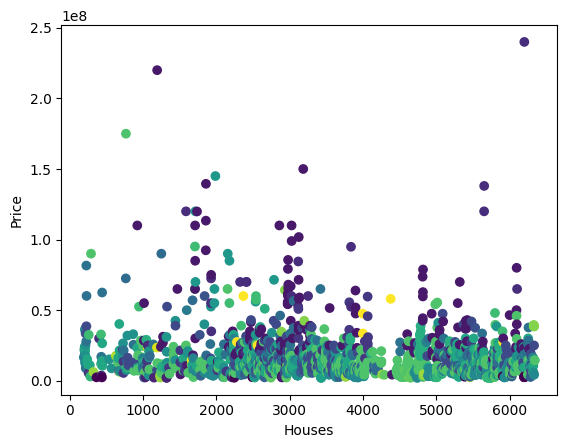

In [29]:
plt.scatter(west_v02.index,
            west_v02['Price'],
            c=west_v02['Location'])
plt.xlabel("Houses")
plt.ylabel("Price")

In [14]:
east_locations = df[df['Location'].str.contains('East', case=False, na=False)]
east_locations["Location"].unique()

array(['Kalyan East', 'Malad East', 'Virar East', 'Borivali East',
       'Mira Road East', 'Kandivali East', 'Andheri East',
       'Goregaon East', 'thakur village kandivali east',
       'Jogeshwari East', 'Chembur East', 'Vasai east', 'Badlapur East',
       'Naigaon East', 'Bandra East', 'Dadar East',
       'Eastern Express Highway Vikhroli', 'Ambernath East',
       'Ghatkopar East', 'Dombivali East', 'Wadala East Wadala',
       'Western Express Highway Kandivali East', 'Bhayandar East',
       'Dahisar East', 'royal palms goregaon east', 'CBD Belapur East',
       'Santacruz East', 'Mulund East', 'Ville Parle East',
       'matunga east', 'Kanjurmarg East', 'Goregaon (East)',
       'Nalasopara East', 'Kurla East', 'Wadala East', 'Vikroli East'],
      dtype=object)

In [31]:
encoded_label = le.fit_transform(east_locations['Location'])
east_v02 = east_locations.copy()
east_v02.drop("Location", axis=1, inplace=True)
east_v02['Location'] = encoded_label
east_v02.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Location
190,2375000,525,1,0,1,0,1,0,1,1,1,1,1,1,0,0,1,16
191,19500000,1200,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,20
192,2000000,420,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,29
193,2500000,540,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29
194,2250000,415,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,29


Text(0, 0.5, 'Price')

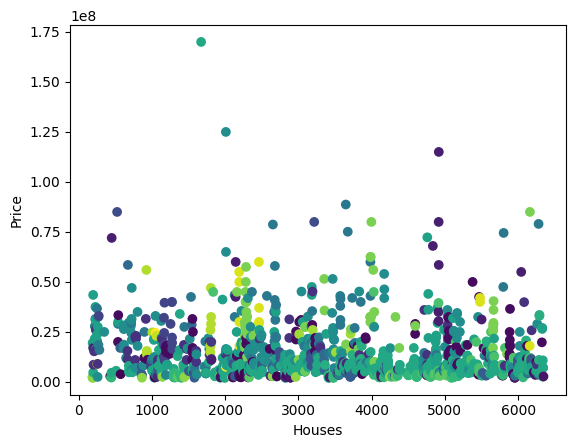

In [32]:
plt.scatter(east_v02.index,
            east_v02['Price'],
            c=east_v02['Location'])
plt.xlabel("Houses")
plt.ylabel("Price")

## Analyzing dependent feature

Text(0, 0.5, 'Price')

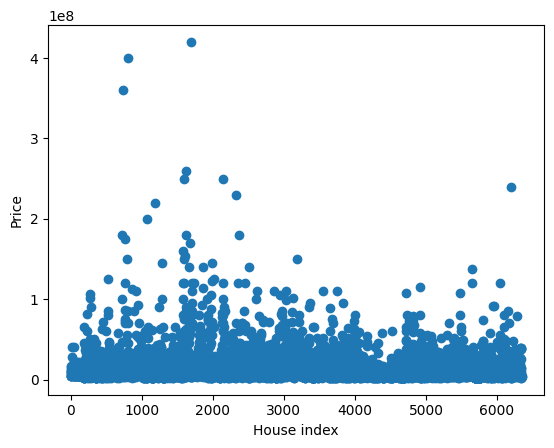

In [35]:
plt.scatter(df.index,
            df['Price'])
plt.xlabel("House index")
plt.ylabel("Price")

<Axes: ylabel='Price'>

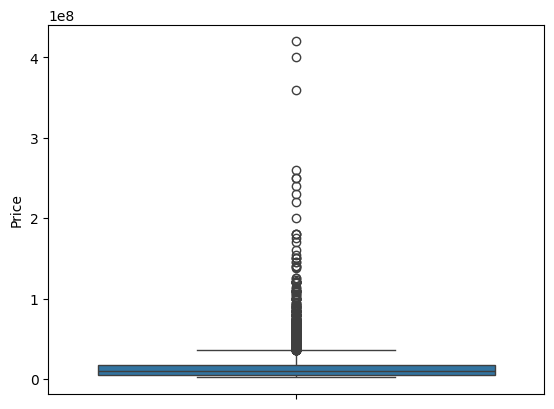

In [36]:
sns.boxplot(df["Price"])

In [38]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame
df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

<Axes: ylabel='Price'>

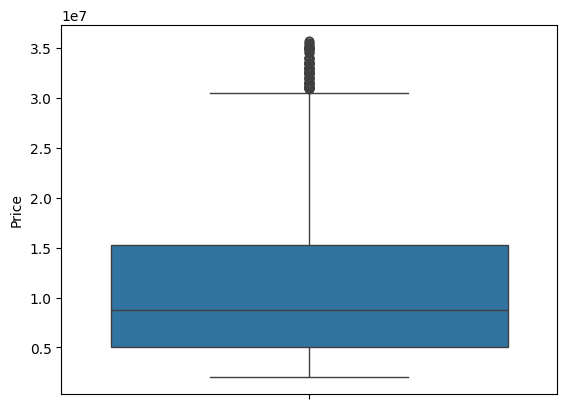

In [39]:
sns.boxplot(df_clean['Price'])

In [42]:
highend_house = df[df['Price'] > 30000000]
highend_house['Location'].unique()

array(['Kharghar', 'Churchgate', 'Prabhadevi', 'Malad East',
       'Goregaon West', 'Kandivali West', 'Borivali West',
       'Goregaon East', 'Wadala', 'Goregaon', 'Santacruz West', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Central Avenue',
       'Chembur East', 'Diamond Market Road', 'Thane West', 'Chembur',
       'Almeida Park', 'Khar', 'Pali Hill', '15th Road', 'Nahur',
       'Bandra East', 'Juhu', 'Dadar East', 'Breach Candy',
       'Worli South Mumbai', 'Andheri East', 'mumbai', 'Ghatkopar East',
       'Malad West', 'juhu tara', 'Kandivali East', 'Peddar Road',
       'Vasai', 'Ghatkopar West', 'Tardeo', 'Napeansea Road', 'Mahalaxmi',
       'Borivali East', 'Andheri West', 'Wadala East Wadala', 'Nerul',
       'Kalyan', 'Samata Nagar Thakur Village', 'Andheri', 'Sanpada',
       'Vikhroli', 'Deonar', 'Yari Road', 'Khar West', 'Mira Road East',
       'Vasant Vihar', 'Sector 58A Seawoods Navi Mumbai', 'Ghatkopar',
       'Gundavali Gaothan', 'Versova', 'Ba